# Univariate Time Series Forecasting

# Problem statement
- To forecast the sales for Furniture and Home Furnishings Stores for the next 12 months

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use( 'fivethirtyeight')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
#load data
df=pd.read_csv("/content/Furniture and Home Furnishings Stores.csv")


In [ ]:
#renaming the columns
df.columns=["date", "sales"]
df

,date,sales
0,2014-01-01,7071.0
1,2014-02-01,7100.0
2,2014-03-01,7966.0
3,2014-04-01,7654.0
4,2014-05-01,8244.0
...,...,...
139,2025-08-01,NaN
140,2025-09-01,NaN
141,2025-10-01,NaN
142,2025-11-01,NaN


In [ ]:
# dropping null values
df.dropna(inplace=True)
df

,date,sales
0,2014-01-01,7071.0
1,2014-02-01,7100.0
2,2014-03-01,7966.0
3,2014-04-01,7654.0
4,2014-05-01,8244.0
...,...,...
131,2024-12-01,12455.0
132,2025-01-01,10414.0
133,2025-02-01,10444.0
134,2025-03-01,11565.0


In [ ]:
# get quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    136 non-null    object 
 1   sales   136 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [ ]:
# converting date column from object to date datatype
df["date"]=pd.to_datetime(df["date"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    136 non-null    datetime64[ns]
 1   sales   136 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.3 KB


In [ ]:
# check first few rows of dataset
df.head()

,date,sales
0,2014-01-01,7071.0
1,2014-02-01,7100.0
2,2014-03-01,7966.0
3,2014-04-01,7654.0
4,2014-05-01,8244.0


In [ ]:
# setting date column as index
df.set_index("date" , inplace=True)


# **Checking stationarity of given series**  


Mean and Variance should be constant over time.No seasonlality should be present

In [ ]:
# import adfuller function from statsmodels library
from statsmodels.tsa.stattools import adfuller

# function to test stationarity of given series
def check_stationarity(series):
  result = adfuller(series)
  test_statistic,p_value=result[0] , result[1]
  print('ADF Test Statistic:',test_statistic)
  print('p-value:' , p_value)
  if p_value<0.05:
    print("p-value is less then 0.05 hence given series is stationary")
  else:
    print("p-value is more than or equal to 0.05 hance give series is not stationary")


ADF Test Statistic: -1.3990930443091605
p-value: 0.5827108471617195
p-value is more than or equal to 0.05 hance give series is not stationary


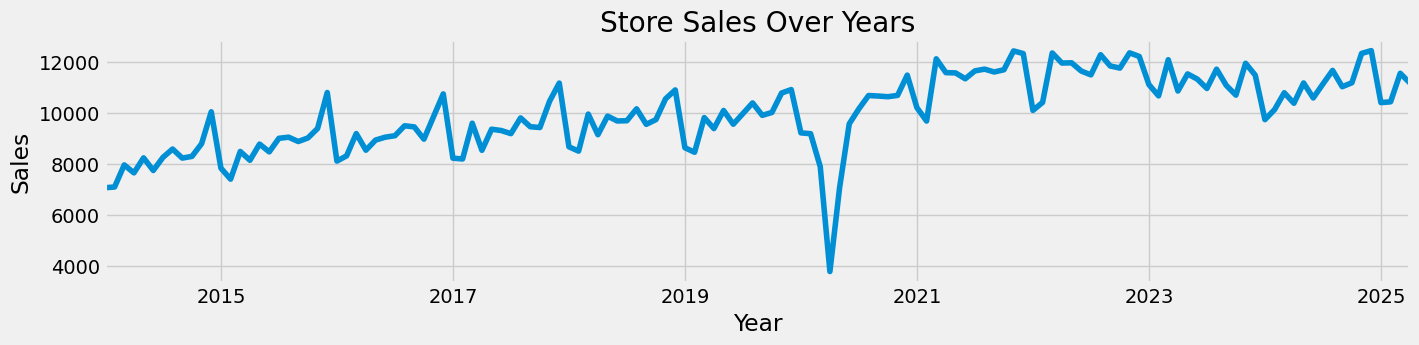

In [ ]:
# plotting the sales trend over years
plt.figure(figsize=(15,3))
df['sales'].plot()
plt.title("Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")

#cheking if given series is stationary using ADF Test
check_stationarity(df['sales'])

Trend Component in present(UP Trend).Seasonality is present. Series is not stationary.

# How to make series stationary?

**Use differencing technique**

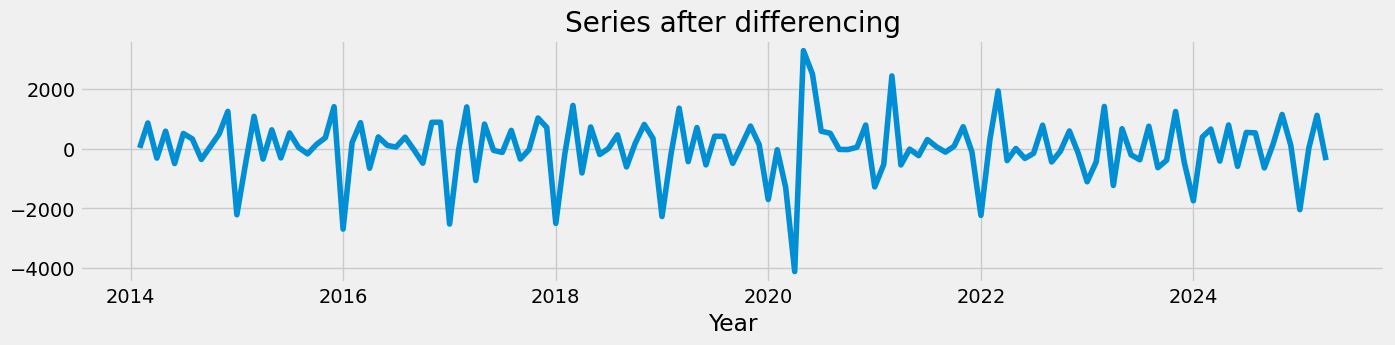

ADF Test Statistic: -3.584929860194321
p-value: 0.00605575913493128
p-value is less then 0.05 hence given series is stationary


In [ ]:
# taking 1st level of differencing
df1 = df.diff()
df1.dropna(inplace=True)

# plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("Series after differencing")
plt.xlabel('Year')
plt.show()

# cheking if series is stationary after 1st level of differencing
check_stationarity(df1["sales"])

# ***Univariate Time Series Models***

*   ARIMA stands for AutoRegressive integrated Moving Average
*   SARIMAX stands for Seasonal AutoRegressive integrated Moving Average with eXogenous Variables




# How to find value of AR (p) , I (d) MA (q) ?
- Use PACF and ACF plots to find value of p and q.
- We have already found value of d as 1 as we have differenced our series for 1st time to make series stationary.

Plot PACF and ACF to identify potential values for p (AR) and q (MA) parameters


Text(0.5, 1.0, 'Autocorrelation  (ACF)')

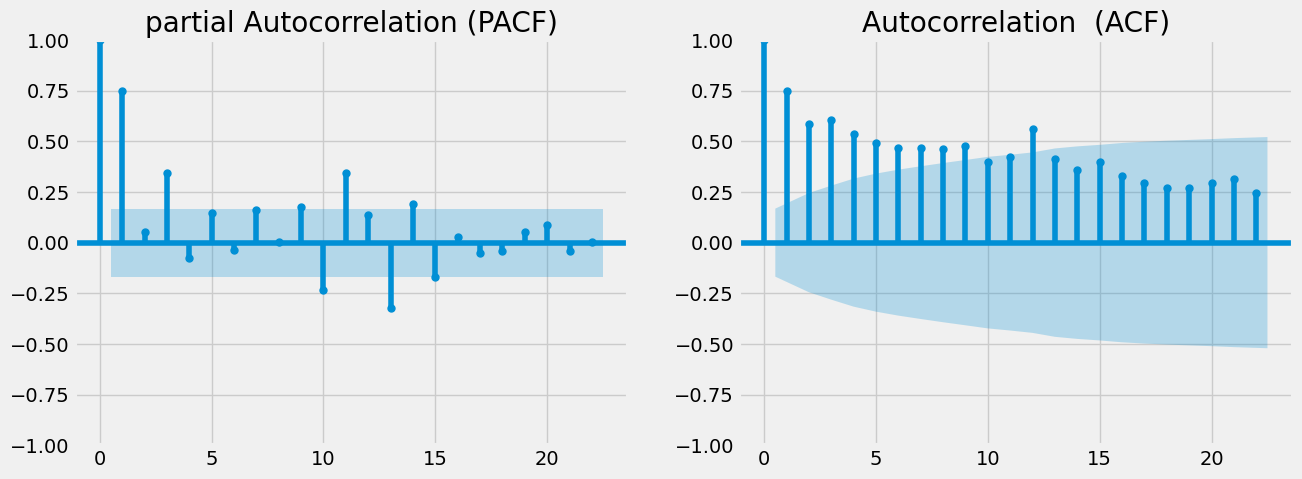

In [ ]:
# import plot_acf,plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create a 1-row , 2-column subplot
fig,ax = plt.subplots(1,2, figsize=(14,5))

# plot PACF on the first subplot
plot_pacf(df["sales"],ax=ax[0])
ax[0].set_title("partial Autocorrelation (PACF)")

# plot ACF on the second subplot
plot_acf(df["sales"],ax=ax[1])
ax[1].set_title("Autocorrelation  (ACF)")




p=1,d=1,q=1

# Model Building


 We will build the model on training data and on testing data will test the model and then will compare actual and predicted values.

In [ ]:
# splitting the DataFrame into training and testing datasets
train_df = df[:-12]
test_df = df[-12:]

# Building ARIMA Model on Training Data

In [ ]:
# import ARIMA class from statsmodels library
from statsmodels.tsa.arima.model import ARIMA

# create instance of ARIMA class
Model_arima=ARIMA(train_df["sales"],order=(1,1,1))

# build the ARIMA model
Model_fit=Model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# summary function will help to have closer look at statistical values
print(Model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  124
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1016.629
Date:                Thu, 19 Jun 2025   AIC                           2039.258
Time:                        15:49:44   BIC                           2047.694
Sample:                    01-01-2014   HQIC                          2042.685
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.121      3.781      0.000       0.220       0.693
ma.L1         -0.8423      0.081    -10.453      0.000      -1.000      -0.684
sigma2      8.548e+05   6.54e+04     13.062      0.0

In [ ]:
len(train_df),len(test_df)

(124, 12)

In [ ]:
# forecasting the next 12 months
n_forecast = 12

# getting prediction for the forecast period (predictions for testing data)
predict = Model_fit.predict(start=len(train_df), end=len(train_df) + n_forecast - 1)

# renaming series for clarity
predict.rename("predicted",inplace=True)
predict


,predicted
2024-05-01,10610.428357
2024-06-01,10711.908467
2024-07-01,10758.207476
2024-08-01,10779.330811
2024-09-01,10788.968063
2024-10-01,10793.364937
2024-11-01,10795.370955
2024-12-01,10796.286175
2025-01-01,10796.703733
2025-02-01,10796.894238


In [ ]:
# creating new dataframe to store predictions
pred_df = pd.DataFrame(predict)

#renaming colums for clarity
pred_df.columns=["predicted_sales"]

# rounding off values to zero decimal places
pred_df["predicted_sales"]=round(pred_df["predicted_sales"],0)
pred_df

,predicted_sales
2024-05-01,10610.0
2024-06-01,10712.0
2024-07-01,10758.0
2024-08-01,10779.0
2024-09-01,10789.0
2024-10-01,10793.0
2024-11-01,10795.0
2024-12-01,10796.0
2025-01-01,10797.0
2025-02-01,10797.0


In [ ]:
# creating new dataframe to store actual test data along with predictions by ARIMA model
actual_vs_pred = pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred["error"]=actual_vs_pred["sales"]-actual_vs_pred["predicted_sales"]

# renaming columns for clarity
actual_vs_pred.rename(columns={"sales":"actual_sales"},inplace=True)
actual_vs_pred


,actual_sales,predicted_sales,error
2024-05-01,11186.0,10610.0,576.0
2024-06-01,10597.0,10712.0,-115.0
2024-07-01,11145.0,10758.0,387.0
2024-08-01,11679.0,10779.0,900.0
2024-09-01,11038.0,10789.0,249.0
2024-10-01,11194.0,10793.0,401.0
2024-11-01,12345.0,10795.0,1550.0
2024-12-01,12455.0,10796.0,1659.0
2025-01-01,10414.0,10797.0,-383.0
2025-02-01,10444.0,10797.0,-353.0


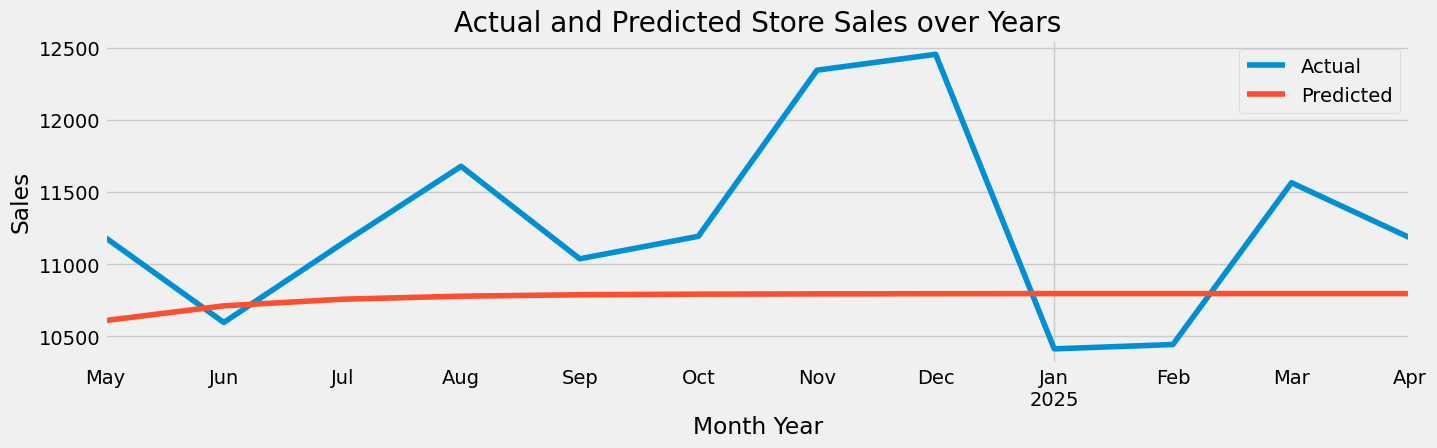

In [ ]:
# plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred['predicted_sales'].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

Actual and Predictions are not at all matching.As we have seasonality present in the data , ARIMA model cant handle the seasonality and thats why we will be using another time series model called SARIMA.

In [ ]:
# Step 1: Uninstall conflicting packages
#!pip uninstall -y numpy pmdarima numba tensorflow

# Step 2: Install compatible versions
#!pip install numpy==1.24.2
#!pip install numba==0.57.1
#!pip install tensorflow==2.13.0
#pip install pmdarima --no-cache-dir

# Find optimal values of non seasonal and seasonal order with auto_arima function

In [ ]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima
# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(train_df["sales"],seasonal=True,m=12)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  124
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -989.614
Date:                              Thu, 19 Jun 2025   AIC                           1989.227
Time:                                      15:52:02   BIC                           2003.288
Sample:                                  01-01-2014   HQIC                          1994.939
                                       - 04-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0724      0.052     -1.397      0.163      -0.174       0.029
ma.L2         -0.49

In [ ]:
# optinal values of non-seasonal order and seasonal order
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 2), (1, 0, 1, 12))

# Building SARIMAX Model on Training Data

In [ ]:
#import  SARIMAX class from statsmodels library
from statsmodels.tsa.statespace.sarimax import SARIMAX

#create instance of SARIMAX Class and providing values of non-seasonal and seasonal order given by auto_arima funtion
model_sarimax=SARIMAX(train_df["sales"],order=auto_arima_result.order,seasonal_order = auto_arima_result.seasonal_order)

# building SARIMAX model
Model_fit=model_sarimax.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will restur series with preditced values for testing data
pred_values = Model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted",inplace=True)

#creating new dataframe to store predicted values for test data
pred_df=pd.DataFrame(pred_values)

#rounding off values to zero decimal places
pred_df["predicted"] = round(pred_df["predicted"],0)

pred_df


,predicted
2024-05-01,11199.0
2024-06-01,11013.0
2024-07-01,11090.0
2024-08-01,11503.0
2024-09-01,11208.0
2024-10-01,11144.0
2024-11-01,11717.0
2024-12-01,11890.0
2025-01-01,10454.0
2025-02-01,10418.0


In [ ]:
# creating new dataframe to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df = pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]

# renaming columns for clarity
actual_vs_pred_df.rename(columns={"sales": "actual_sales"}, inplace=True)
actual_vs_pred_df.rename(columns={"predicted": "predicted_sales"},inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-05-01,11186.0,11199.0,-13.0
2024-06-01,10597.0,11013.0,-416.0
2024-07-01,11145.0,11090.0,55.0
2024-08-01,11679.0,11503.0,176.0
2024-09-01,11038.0,11208.0,-170.0
2024-10-01,11194.0,11144.0,50.0
2024-11-01,12345.0,11717.0,628.0
2024-12-01,12455.0,11890.0,565.0
2025-01-01,10414.0,10454.0,-40.0
2025-02-01,10444.0,10418.0,26.0


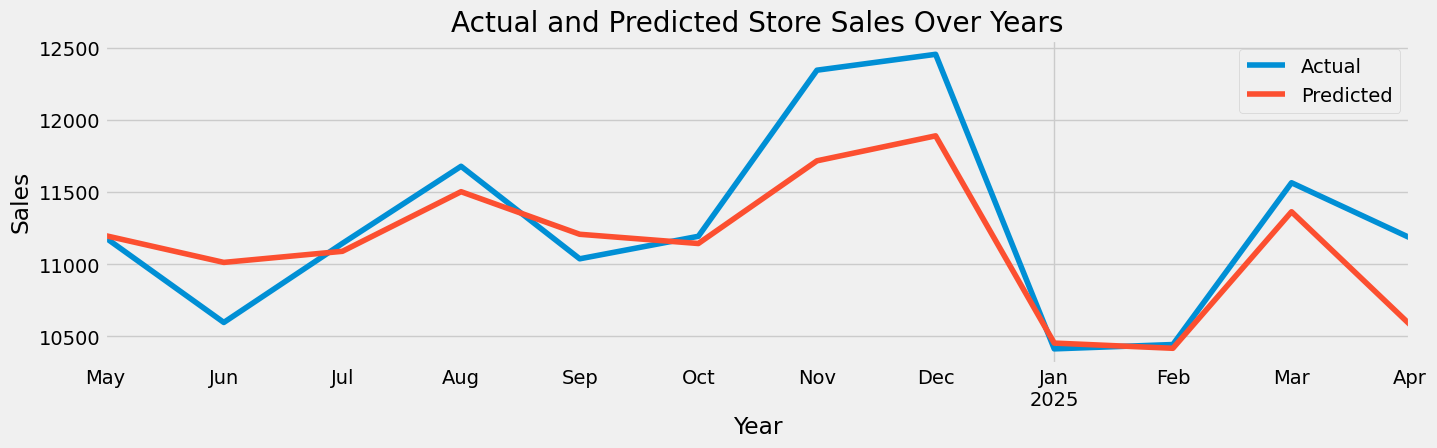

In [ ]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()


Actual and Predicted sales for test data are somewhat close to each other. SARIMAX Model is giving decent predictions. So let's try to build model on entire dataset.

# Building SARIMAX Model on entire data

In [ ]:
# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(df["sales"],seasonal=True,m=12)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  136
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1079.560
Date:                              Thu, 19 Jun 2025   AIC                           2171.120
Time:                                      15:52:53   BIC                           2188.552
Sample:                                  01-01-2014   HQIC                          2178.204
                                       - 04-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0434      3.142      0.332      0.740      -5.115       7.202
ma.L1         -0.06

In [ ]:
# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(df["sales"],order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values
pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

# renaming columns for clarity
pred_values=pred_values.rename("predicted",inplace=True)

# creating new dataframe to store predicted values
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df



,predicted
2025-05-01,11824.0
2025-06-01,11570.0
2025-07-01,11757.0
2025-08-01,12160.0
2025-09-01,11844.0
2025-10-01,11823.0
2025-11-01,12402.0
2025-12-01,12760.0
2026-01-01,11143.0
2026-02-01,11083.0


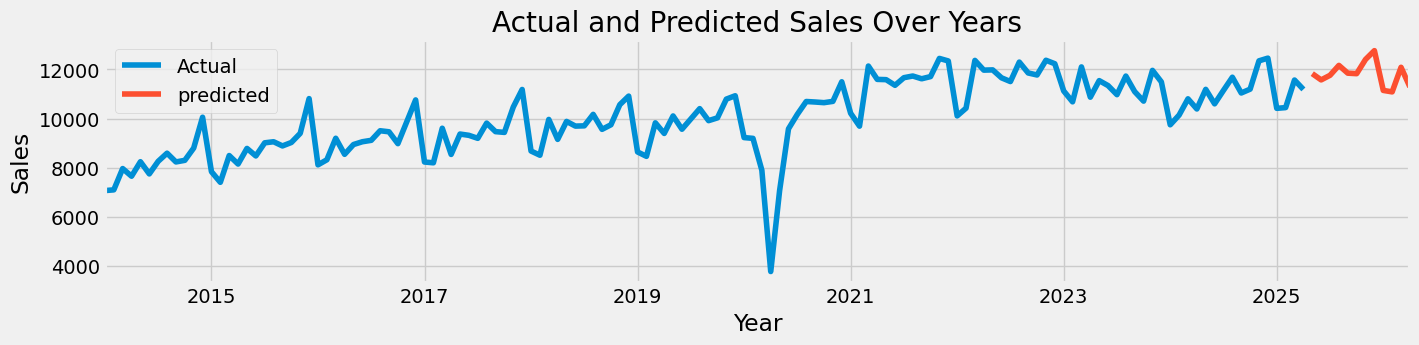

In [ ]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,3))
df["sales"].plot(legend=True,label="Actual")
pred_df["predicted"].plot(legend=True,label="predicted")
plt.title("Actual and Predicted Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()
